In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
X = np.random.rand(100, 5)
y = np.random.randint(2, size=100)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
loss_sgd = []
loss_adagrad = []
loss_adam = []

In [11]:
for optimizer_name in ['SGD', 'Adagrad', 'Adam']:
    if optimizer_name == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
    elif optimizer_name == 'Adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.02)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

    model.compile(loss='binary_crossentropy', optimizer=optimizer)

    history = model.fit(X, y, epochs=10, verbose=0)

    loss_values = history.history['loss']
    if optimizer_name == 'SGD':
        loss_sgd = loss_values
    elif optimizer_name == 'Adagrad':
        loss_adagrad = loss_values
    else:
        loss_adam = loss_values

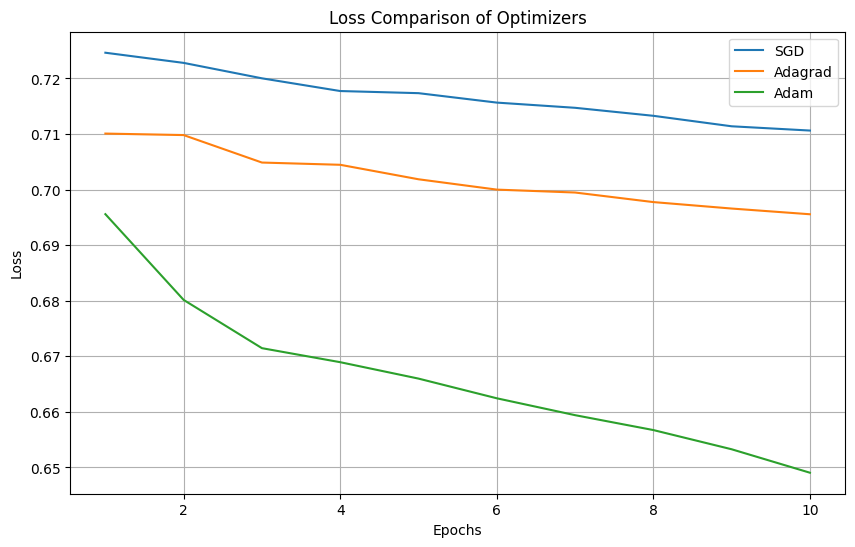

In [12]:
epochs = np.arange(1, 11)  # Epochs (1 to 10)
plt.figure(figsize=(10, 6))  # Set plot size
plt.plot(epochs, loss_sgd, label='SGD')
plt.plot(epochs, loss_adagrad, label='Adagrad')
plt.plot(epochs, loss_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison of Optimizers')
plt.legend()
plt.grid(True)
plt.show()